Se plantea realizar una interpolación para determinar las dimensiones (L1, L2 y L3) de un mecanismo para un segmento rectilíneo de 20 cm, con un rango angular de 30 y 55 grados de giro de la manivela con criterio de rectitud como criterio de velocidad. 

Construir un paso a paso es esencial para el desarrollo del problema, así que se hará de la siguiente forma: 
1. Construir la tabla de datos en Excel y cargarla a Python.
2. Identificar las librerías a utilizar.
3. Explicar la nomenclatura utilizada para subir la tabla.
4. Aplicar al menos dos métodos de interpolación acorde con los datos. 
5. Evaluar el rendimiento de cada uno de los métodos de interpolación.
6. Realizar comparación entre los diferentes métodos de interpolación.
7. Entregar resultados. 

In [58]:
# Importando la tabla de Excel 

import pandas as pd
archivo_excel = 'C:/Users/esteb/OneDrive/Documents/Maestria/I/Programacion/Trabajos/I/Repositorio/Datos.xlsx'
datos = pd.read_excel(archivo_excel)
datos.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,20,170,0.056,1.000000e-08,0.0038,1.436,2.975,3.963,0.601,0.00006,0.00137,1.045,2.075,2.613,0.480
1,40,160,0.111,4.000000e-08,0.0153,1.504,2.950,3.925,1.193,0.00038,0.00274,1.124,2.050,2.575,0.950
2,60,150,0.167,2.700000e-06,0.0348,1.565,2.900,3.850,1.763,0.00106,0.00387,1.178,2.025,2.538,1.411
3,80,140,0.222,1.000000e-05,0.0627,1.611,2.825,3.738,2.299,0.00340,0.00503,1.229,1.975,2.463,1.845
4,100,130,0.278,4.000000e-05,0.0990,1.646,2.725,3.588,2.790,0.00910,0.00640,1.275,1.900,2.350,2.237


Una forma que se encontró para subir fácilmente los datos fue nombrando las filas de la "a" a la "o" de la siguiente forma:

In [59]:
# Mostrando imagen de la tabla con nomenclatura 

from PIL import Image
ruta_imagen = ruta_imagen = r"C:\Users\esteb\OneDrive\Documents\Maestria\I\Programacion\Trabajos\I\Repositorio\Imagen_tabla.png"
imagen_tabla = Image.open(ruta_imagen)
imagen_tabla.show()

Cuando se nombre alguna letra de la tabla de datos será útil ver la imagen de la tabla con la nomenclatura. 

Los valores de "x" y "y" en el contexto de la interpolación representan los puntos conocidos en los que se tiene información sobre la relación entre dos variables. 
"x" representa la variable independiente y "y" representa la variable dependiente. 

Los métodos de interpolación que se van a utilizar son los siguientes: 
1. *Lagrange:* Es una técnica utilizada para construir un polinomio que pasa a través de un conjunto dado de puntos de datos. Es útil cuando se desea aproximar una función desconocida a partir de valores discretos conocidos. Este método se basa en la idea de que un polinomio de grado n puede ser completamente determinado por n+1 puntos en un plano cartesiano.

2. *Splines:* Es una técnica utilizada para construir una curva suave que pasa a través de un conjunto dado de puntos de datos. A diferencia de otros métodos de interpolación que utilizan un solo polinomio para conectar todos los puntos, los Splines dividen el dominio en segmentos más pequeños y utilizan polinomios de bajo grado para interpolar en cada segmento.

3. *Interpolación por ajuste de curvas:* Es una técnica utilizada para aproximar una función desconocida a partir de un conjunto de puntos de datos. A diferencia de la interpolación polinómica, donde se busca un polinomio que pase exactamente por todos los puntos, el ajuste de curvas busca encontrar una función continua que se aproxime lo mejor posible a los datos, sin necesariamente pasar a través de ellos.

--- *¿Por qué se escogieron estos métodos?*

----- Después de analizar los datos de la tabla, se observó que los datos eran pocos y que al graficarlos seguían una tendencia, estos métodos funcionan bien con las características mencionadas. 


Se comenzará a trabajar con el criterio de rectitud.
La variable independiente será el rango angular que en nuestra tabla será "a", las variables dependientes serán "g", "h", "i". 

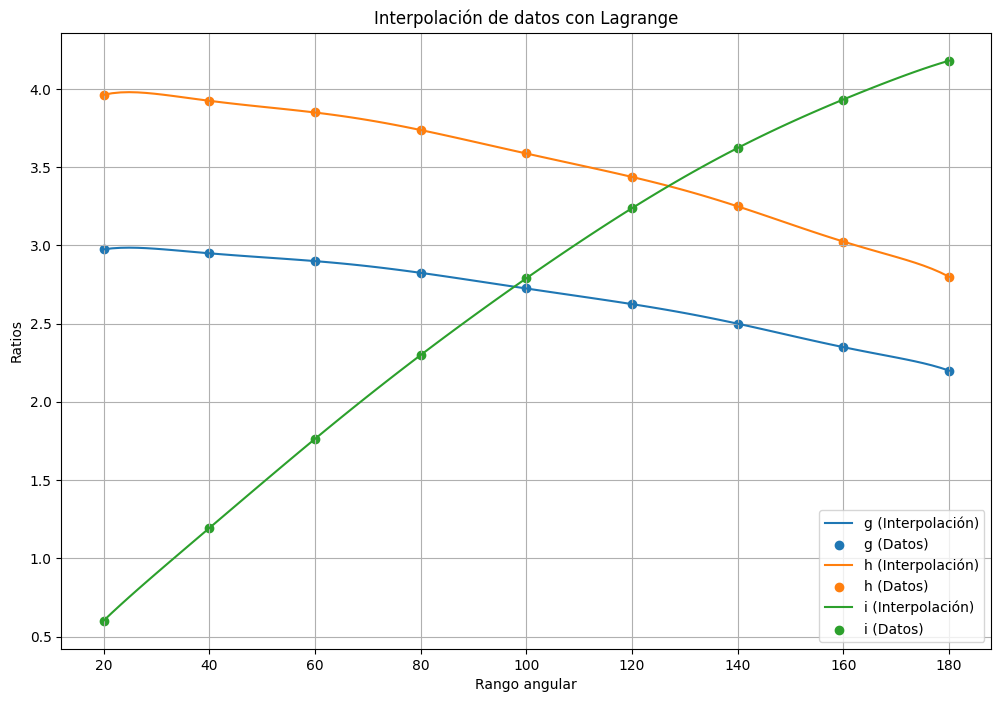

Resultados de la interpolación en 30 y 55:
Columna: g
Valor interpolado en 30: 2.978606414795612
Valor interpolado en 55: 2.9128142565514437

Columna: h
Valor interpolado en 30: 3.9687366027835975
Valor interpolado en 55: 3.8690580493202815

Columna: i
Valor interpolado en 30: 0.9045451049807252
Valor interpolado en 55: 1.6223491523298776



In [60]:
# Aplicando Interpolación Lagrange

from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

x = datos['a'].tolist()

columnas_interp = ['g', 'h', 'i']

x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    
    polinomio_lagrange = lagrange(x, y)
    
    
    y_interp = polinomio_lagrange(x_interp)
    
    valor_interpolado_30 = polinomio_lagrange(30)
    valor_interpolado_55 = polinomio_lagrange(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Lagrange')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

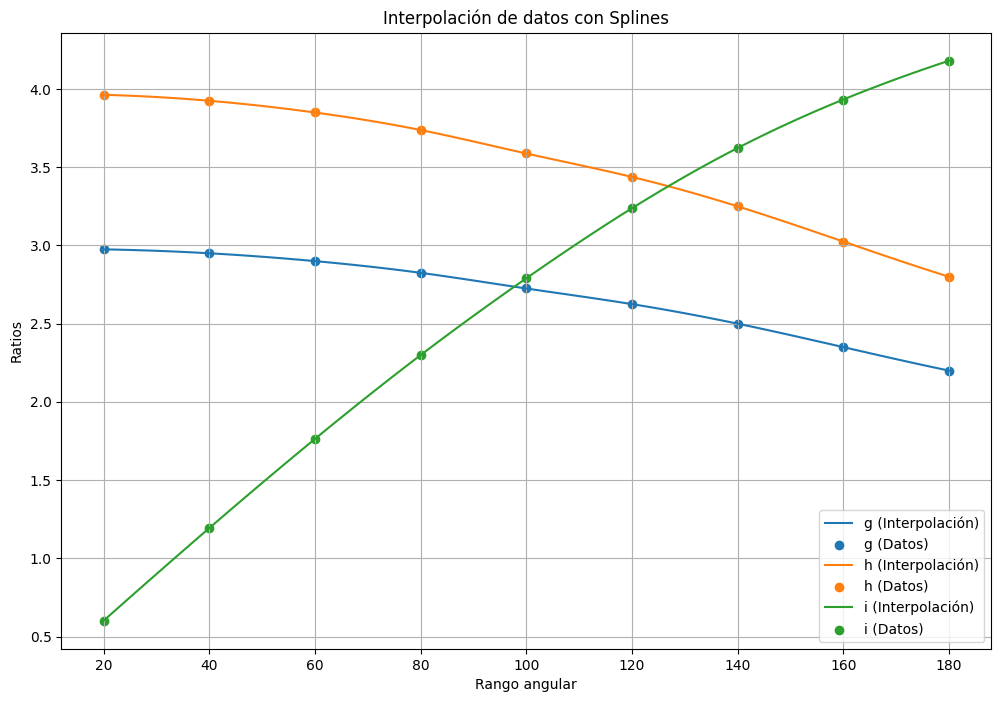

Resultados de la interpolación en 30 y 55:
Columna: g
Valor interpolado en 30: 2.9658032852564102
Valor interpolado en 55: 2.914687750400641

Columna: h
Valor interpolado en 30: 3.948917708333333
Valor interpolado en 55: 3.8719626302083334

Columna: i
Valor interpolado en 30: 0.8990685897435899
Valor interpolado en 55: 1.623158733974359



In [61]:
# Aplicando Interpolación Splines 

from scipy.interpolate import CubicSpline

x = datos['a'].tolist()

columnas_interp = ['g', 'h', 'i']

# Definir x_interp
x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    spline = CubicSpline(x, y)
    
    y_interp = spline(x_interp)
    
    valor_interpolado_30 = spline(30)
    valor_interpolado_55 = spline(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Splines')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

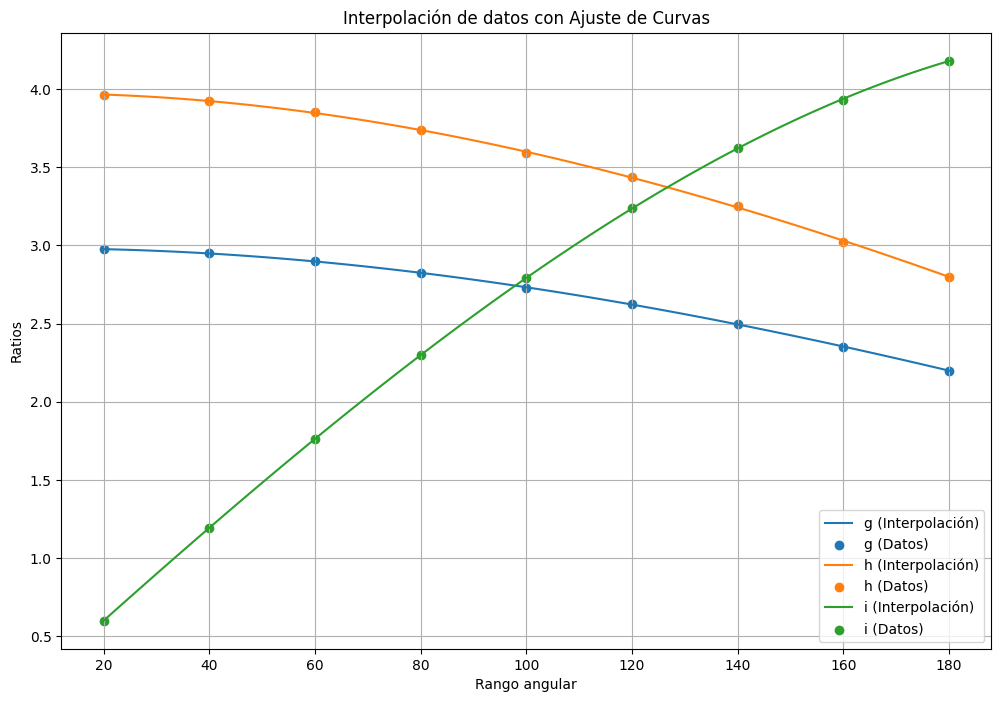

Resultados de la interpolación en 30 y 55:
Columna: g
Valor interpolado en 30: 2.9654694264069272
Valor interpolado en 55: 2.912434895833335

Columna: h
Valor interpolado en 30: 3.948473755411255
Valor interpolado en 55: 3.8688828125000008

Columna: i
Valor interpolado en 30: 0.8997658279220785
Valor interpolado en 55: 1.6233606770833342



In [62]:
# Aplicando Interpolación de Ajuste de Curvas

x = datos['a'].tolist()

columnas_interp = ['g', 'h', 'i']

x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    coeficientes = np.polyfit(x, y, deg=3)  
    
    funcion_ajustada = np.poly1d(coeficientes)
    
    y_interp = funcion_ajustada(x_interp)
    
    valor_interpolado_30 = funcion_ajustada(30)
    valor_interpolado_55 = funcion_ajustada(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Ajuste de Curvas')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

Gráficamente se evidencia que los métodos de Splines y Ajuste de curvas son los más indicados para la interpolación de los datos dados por la suavidad. 

Para confirmar se procede a calcular el error cuadrático medio (ECM) en los tres modelos, el ECM es una medida comúnmente utilizada para evaluar la precisión de un modelo predictivo o de ajuste en estadística y aprendizaje automático. Este error cuantifica la discrepancia promedio entre los valores predichos por un modelo y los valores reales o observados en un conjunto de datos.

In [63]:
# ECM para L1/L2 (Columna g)

y = datos['g'].tolist()
x = datos['a'].tolist()

# Interpolación de Lagrange
polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines 
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3)  
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 1.43024623321654e-20
ECM para Splines cúbicos: 0.0
ECM para ajuste de curvas: 1.2526054192720476e-05


In [64]:
#ECM para L3/L2 (Columna h)

y = datos['h'].tolist()
x = datos['a'].tolist()

# Interpolación de Lagrange
polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3) 
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 9.367160599367335e-20
ECM para Splines cúbicos: 0.0
ECM para ajuste de curvas: 2.729373096039796e-05


In [65]:
#ECM para Δx/L2 (Columna i)

y = datos['i'].tolist()
x = datos['a'].tolist()

# Interpolación de Lagrange
polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3)  
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 2.5178936891099596e-20
ECM para Splines cúbicos: 0.0
ECM para ajuste de curvas: 4.9115760782434554e-06


Se evidencia que los tres métodos se ajustan muy bien a los datos, destacando el método de Lagrange y el método de Splines.

El método de Splines muestra mayor suavidad de la interpolación (gráficamente), por lo cual será escogido para encontrar los valores de L1, L2 Y L3.

In [66]:
# Encontrando los valores de L1, L2 y L3 con el método de interpolación Spline

x = datos['a'].tolist()

spline_g = CubicSpline(x, datos['g'])
spline_h = CubicSpline(x, datos['h'])
spline_i = CubicSpline(x, datos['i'])

valor_interpolado_30_55_g = spline_g([30, 55])
valor_interpolado_30_55_h = spline_h([30, 55])
valor_interpolado_30_55_i = spline_i([30, 55])

L2 = 20 / valor_interpolado_30_55_i
L1 = valor_interpolado_30_55_g * L2
L3 = valor_interpolado_30_55_h * L2

print(f"L1: {L1}")
print(f"L2: {L2}")
print(f"L3: {L3}")

L1: [65.97501724 35.91377343]
L2: [22.24524383 12.32165381]
L3: [87.84463729 47.7089831 ]


Se continua con el criterio de velocidad constante. 
La variable independiente será el rango angular que en nuestra tabla será "a", las variables dependientes serán "m", "n", "o". 

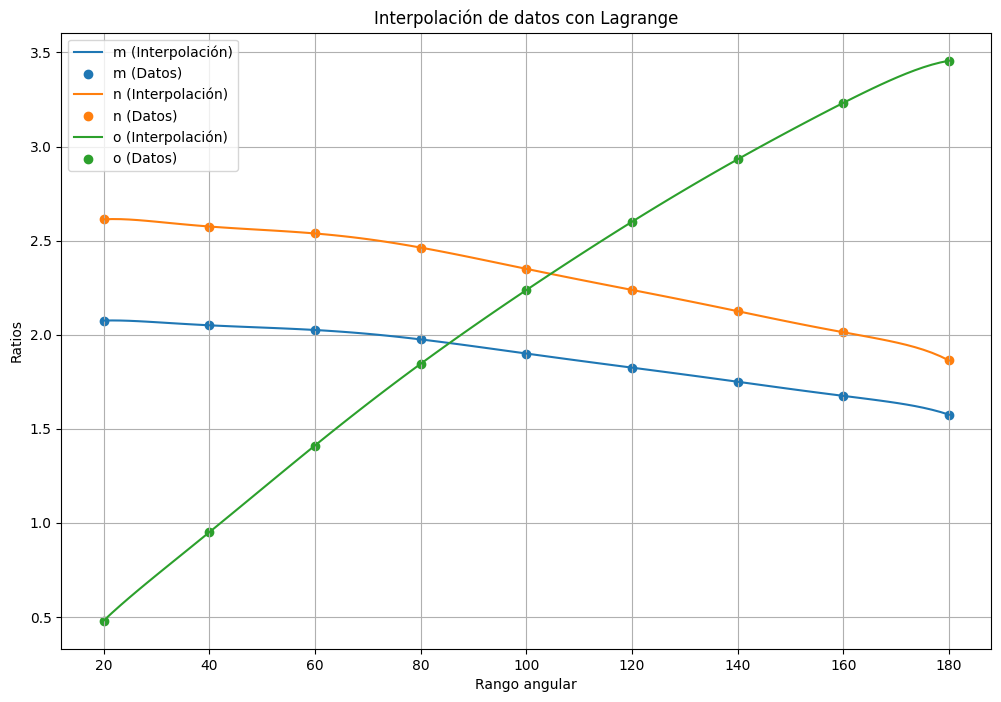

Resultados de la interpolación en 30 y 55:
Columna: m
Valor interpolado en 30: 2.066273498534992
Valor interpolado en 55: 2.0321050703524937

Columna: n
Valor interpolado en 30: 2.600356567382981
Valor interpolado en 55: 2.548406744480096

Columna: o
Valor interpolado en 30: 0.7222279663086086
Valor interpolado en 55: 1.2964243695723292



In [67]:
# Aplicando Interpolación Lagrange

x = datos['a'].tolist()

columnas_interp = ['m', 'n', 'o']

x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    
    polinomio_lagrange = lagrange(x, y)
    
    
    y_interp = polinomio_lagrange(x_interp)
    
    valor_interpolado_30 = polinomio_lagrange(30)
    valor_interpolado_55 = polinomio_lagrange(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Lagrange')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

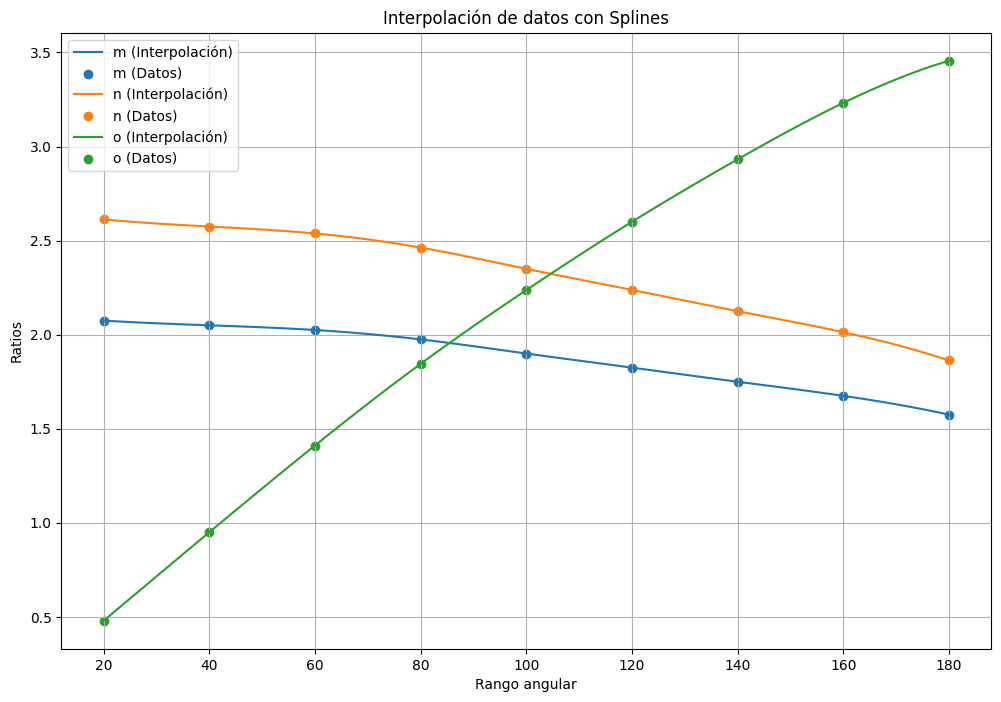

Resultados de la interpolación en 30 y 55:
Columna: m
Valor interpolado en 30: 2.0606630608974355
Valor interpolado en 55: 2.032857321714743

Columna: n
Valor interpolado en 30: 2.5910132211538466
Valor interpolado en 55: 2.5496603064903844

Columna: o
Valor interpolado en 30: 0.7150971955128205
Valor interpolado en 55: 1.297493078926282



In [68]:
# Aplicando Interpolación Splines

x = datos['a'].tolist()

columnas_interp = ['m', 'n', 'o']

x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    spline = CubicSpline(x, y)
    
    y_interp = spline(x_interp)
    
    valor_interpolado_30 = spline(30)
    valor_interpolado_55 = spline(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Splines')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

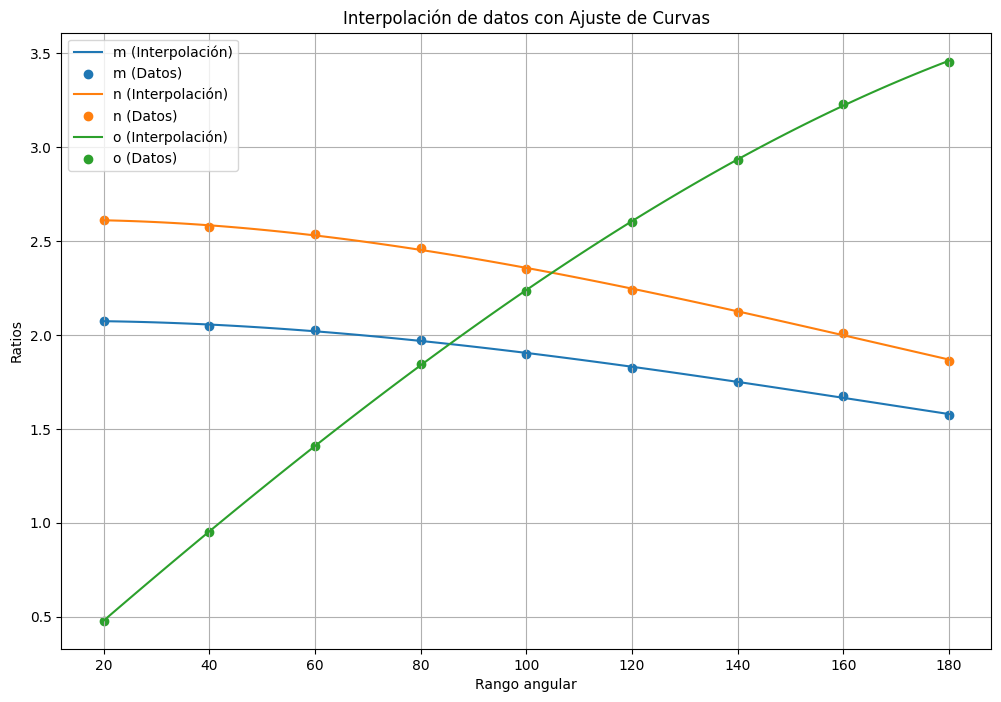

Resultados de la interpolación en 30 y 55:
Columna: m
Valor interpolado en 30: 2.0672754329004337
Valor interpolado en 55: 2.030533854166668

Columna: n
Valor interpolado en 30: 2.6012767857142864
Valor interpolado en 55: 2.5461354166666674

Columna: o
Valor interpolado en 30: 0.7188576839826845
Valor interpolado en 55: 1.2973098958333342



In [69]:
# Aplicando Interpolación de Ajuste de Curvas

x = datos['a'].tolist()

columnas_interp = ['m', 'n', 'o']

x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    coeficientes = np.polyfit(x, y, deg=3)  
    
    funcion_ajustada = np.poly1d(coeficientes)
    
    y_interp = funcion_ajustada(x_interp)
    
    valor_interpolado_30 = funcion_ajustada(30)
    valor_interpolado_55 = funcion_ajustada(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Ajuste de Curvas')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

In [70]:
# ECM para L1/L2 (Columna m)

y = datos['m'].tolist()
x = datos['a'].tolist()

polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3)  
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 5.301732395487272e-21
ECM para Splines cúbicos: 5.4782007307014706e-33
ECM para ajuste de curvas: 2.9962321628988547e-05


In [71]:
# ECM para L3/L2 (Columna n)

y = datos['n'].tolist()
x = datos['a'].tolist()

polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3) 
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 4.03640658595528e-21
ECM para Splines cúbicos: 5.4782007307014706e-33
ECM para ajuste de curvas: 6.935882635882561e-05


In [72]:
#ECM para Δx/L2 (Columna o)

y = datos['o'].tolist()
x = datos['a'].tolist()

polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3)  
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 1.7170114941088894e-21
ECM para Splines cúbicos: 2.1912802922805882e-32
ECM para ajuste de curvas: 2.7926727593394656e-05


Se evidencia que los tres métodos se ajustan muy bien a los datos, destacando el método de Lagrange y el método de Splines.

El método de Splines muestra mayor suavidad de la interpolación (gráficamente), por lo cual será escogido para encontrar los valores de L1, L2 Y L3.

In [73]:
# Encontrando los valores de L1, L2 y L3 con el método de interpolación Spline

x = datos['a'].tolist()

spline_m = CubicSpline(x, datos['m'])
spline_n = CubicSpline(x, datos['n'])
spline_o = CubicSpline(x, datos['o'])

valor_interpolado_30_55_m = spline_m([30, 55])
valor_interpolado_30_55_n = spline_n([30, 55])
valor_interpolado_30_55_o = spline_o([30, 55])

L2 = 20 / valor_interpolado_30_55_o

L1 = valor_interpolado_30_55_m * L2
L3 = valor_interpolado_30_55_n * L2

print(f"L1: {L1}")
print(f"L2: {L2}")
print(f"L3: {L3}")

L1: [57.63309027 31.33515476]
L2: [27.96822603 15.41434041]
L3: [72.46604342 39.3013319 ]


Visualizando la geometría del mecanismo de Hoeken los datos de L1, L2 Y L3 calculados en ambos criterios son lógicos y acordes a esta.

Para un segmento rectilíneo de 20 cm con un rango angular de 30 y 55 grados de giro de la manivela con criterio de rectitud los valores son los siguientes; 

* Para 30 grados:
  - L1: 65.97501724 cm
  - L2: 22.24524383 cm
  - L3: 87.84463729 cm

* Para 55 grados:
  - L1: 35.91377343 cm
  - L2: 12.32165381 cm
  - L3: 47.7089831 cm

 Para un segmento rectilíneo de 20 cm con un rango angular de 30 y 55 grados de giro de la manivela con criterio de velocidad constante los valores son los siguientes; 

* Para 30 grados:
  - L1: 57.63309027 cm
  - L2: 27.96822603 cm
  - L3: 72.46604342 cm

* Para 55 grados:
  - L1: 31.33515476 cm
  - L2: 15.41434041 cm
  - L3: 39.3013319 cm